In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

: 

In [6]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Akansha
[nltk_data]    |     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Akansha
[nltk_data]    |     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Akansha
[nltk_data]    |     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Akansha
[nltk_data]    |     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to


True

In [9]:
df= pd.read_csv('C:\\Users\\Akansha Agarwal\\Desktop\\Internship\\precovid_2019\\2019(1).csv')

# **TEXT** **CLEANING**

In [10]:
#dropping duplicates
df1 = pd.DataFrame(df['text'])
df1 = df1.drop_duplicates(ignore_index=True)
print(df1.shape)
print(df1)

(25225, 1)
                                                    text
0      Make sure your #supplychain is ready for what’...
1      Agile #ProjectManagement Solutions for #Supply...
2      Smart Contracts automate and improve efficienc...
3      How #digital is disrupting the #agricultural s...
4      Achieving #supplychain agility is a top priori...
...                                                  ...
25220  Customer success story: @trieaglesales moves b...
25221  Procurement can deliver real value to organisa...
25222  Not sure how/why #finance should be involved i...
25223  Recently, Gartner released an in-depth report ...
25224  A #BusinessCase for Better #ThirdPartyRisk Man...

[25225 rows x 1 columns]


In [11]:
#removing the stopwords used in the text,removing #,removing @,removing http,removing +,any sort of special chahracters

from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)

df1['processed_text'] = df1['text'].str.lower().str.replace('(@[a-z0-9]+)\w+',' ').str.replace('(http\S+)', ' ').str.replace('([^0-9a-z \t])',' ').str.replace(' +',' ').str.replace('&', ' ').apply(lambda x: [i for i in x.split() if not i in swords])

C:\Users\Akansha Agarwal\AppData\Local\Temp\ipykernel_34792\4066134293.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['processed_text'] = df1['text'].str.lower().str.replace('(@[a-z0-9]+)\w+',' ').str.replace('(http\S+)', ' ').str.replace('([^0-9a-z \t])',' ').str.replace(' +',' ').str.replace('&', ' ').apply(lambda x: [i for i in x.split() if not i in swords])


In [12]:
#stemming the data
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df1['stemmed'] = df1['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])
print(df1)

                                                    text  \
0      Make sure your #supplychain is ready for what’...   
1      Agile #ProjectManagement Solutions for #Supply...   
2      Smart Contracts automate and improve efficienc...   
3      How #digital is disrupting the #agricultural s...   
4      Achieving #supplychain agility is a top priori...   
...                                                  ...   
25220  Customer success story: @trieaglesales moves b...   
25221  Procurement can deliver real value to organisa...   
25222  Not sure how/why #finance should be involved i...   
25223  Recently, Gartner released an in-depth report ...   
25224  A #BusinessCase for Better #ThirdPartyRisk Man...   

                                          processed_text  \
0      [make, sure, supplychain, ready, come, year, d...   
1      [agile, projectmanagement, solutions, supplych...   
2      [smart, contracts, automate, improve, efficien...   
3      [digital, disrupting, agricultur

In [13]:
#lemmatizing the word
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
df1['lemmatized'] = df1['processed_text'].apply(lambda x: [lemma.lemmatize(i) for i in x if i != ''])

In [14]:
#removing the hashtag words from the text
df1['removed_hashtags'] =  df1['text'].str.lower().str.replace('(@[a-z0-9]+)\w+',' ').str.replace('(http\S+)', ' ').str.replace("#[A-Za-z0-9_]+","").str.replace('([^0-9a-z \t])',' ').str.replace('amp', ' ').str.replace(' +',' ').str.replace('gt','').apply(lambda x: [i for i in x.split() if not i in swords])

#lemmatizing and stemming
df1['stemmed_nohash'] = df1['removed_hashtags'].apply(lambda x: [ps.stem(i) for i in x if i != ''])
df1['lemmatized_nohash'] = df1['removed_hashtags'].apply(lambda x: [lemma.lemmatize(i) for i in x if i != ''])

C:\Users\Akansha Agarwal\AppData\Local\Temp\ipykernel_34792\2364569349.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['removed_hashtags'] =  df1['text'].str.lower().str.replace('(@[a-z0-9]+)\w+',' ').str.replace('(http\S+)', ' ').str.replace("#[A-Za-z0-9_]+","").str.replace('([^0-9a-z \t])',' ').str.replace('amp', ' ').str.replace(' +',' ').str.replace('gt','').apply(lambda x: [i for i in x.split() if not i in swords])


# HASHTAGS

In [15]:
import re
hashtags=[]
for text in df1['text']:
    hashtag =  re.findall("#([a-zA-Z0-9_]{1,50})",text.lower())
    hashtags.append(hashtag)

MENTIONS

In [16]:
import re
mentions=[]
for text in df1['text']:
    mention =  re.findall("@([a-zA-Z0-9_]{1,50})",text.lower())
    mentions.append(mention)

WORD FREQUENCY ANALYSIS

             word  count
0          supply   5010
1           chain   4382
2      visibility   2370
3            risk   2317
4        planning   2114
5      efficiency   1673
6        strategy   1487
7      management   1406
8           learn   1319
9             new   1319
10        quality   1275
11       business   1255
12           time   1027
13            via    979
14        improve    948
15           read    946
16           help    940
17  collaboration    876
18           data    865
19             us    819
20            end    808
21      companies    806
22       industry    777
23          today    721
24         global    715
25     technology    686
26           find    643
27      logistics    630
28        digital    629
29     disruption    601
         word  count
0      supply   5010
1       chain   4382
2  visibility   2370
3        risk   2317
4    planning   2114
5  efficiency   1673
6    strategy   1487
7  management   1406
8       learn   1319
9         new  

<AxesSubplot: xlabel='count', ylabel='word'>

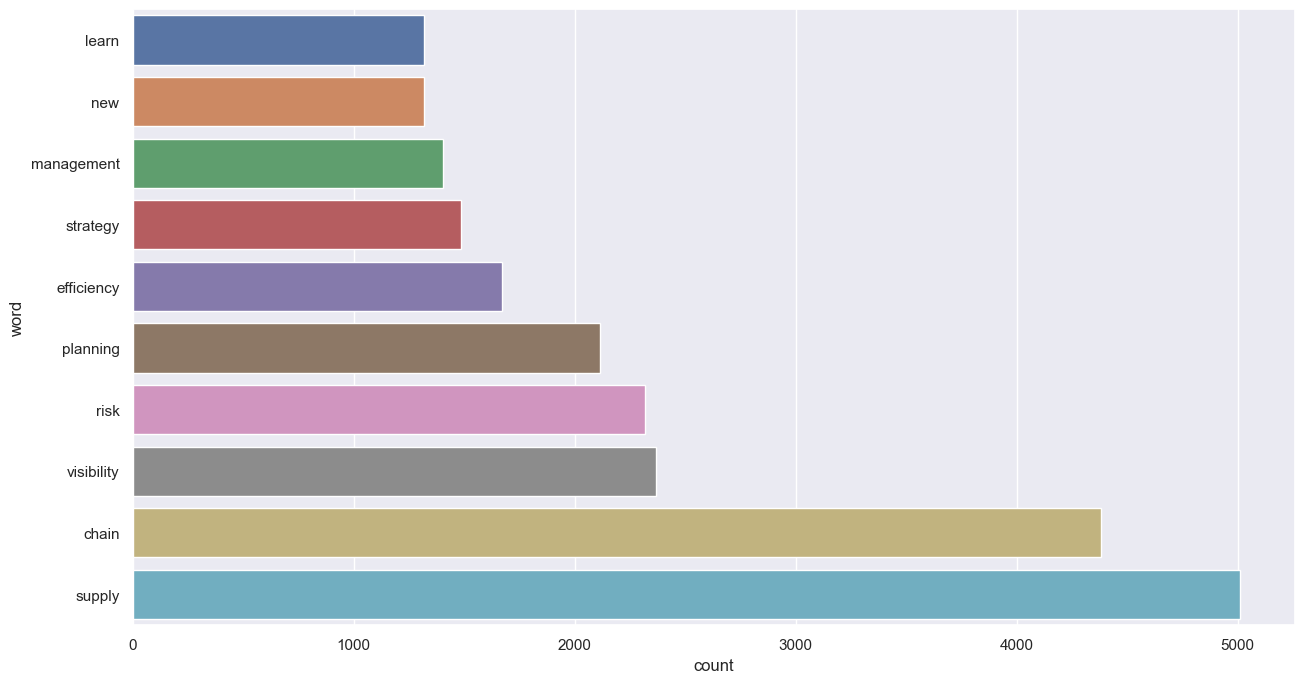

In [18]:
#counting word frequency without hashtags
import itertools
import collections
all_words =[]
for text in (df1['removed_hashtags'].drop_duplicates()):
  for i in text:
    all_words.append(i)


counts_no = collections.Counter(all_words)
df_count=pd.DataFrame(counts_no.most_common(30))
df_count.columns=['word','count']
print(df_count)

df_count1=pd.DataFrame(counts_no.most_common(10))
df_count1.columns=['word','count']
print(df_count1)

df_count1 = df_count1.sort_values(by='count')
sns.set_theme(style="whitegrid")




plt.figure(figsize=(15,8))
sns.set(rc = {'figure.figsize':(80,80)})
sns.barplot(x='count', y='word', data=df_count1)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


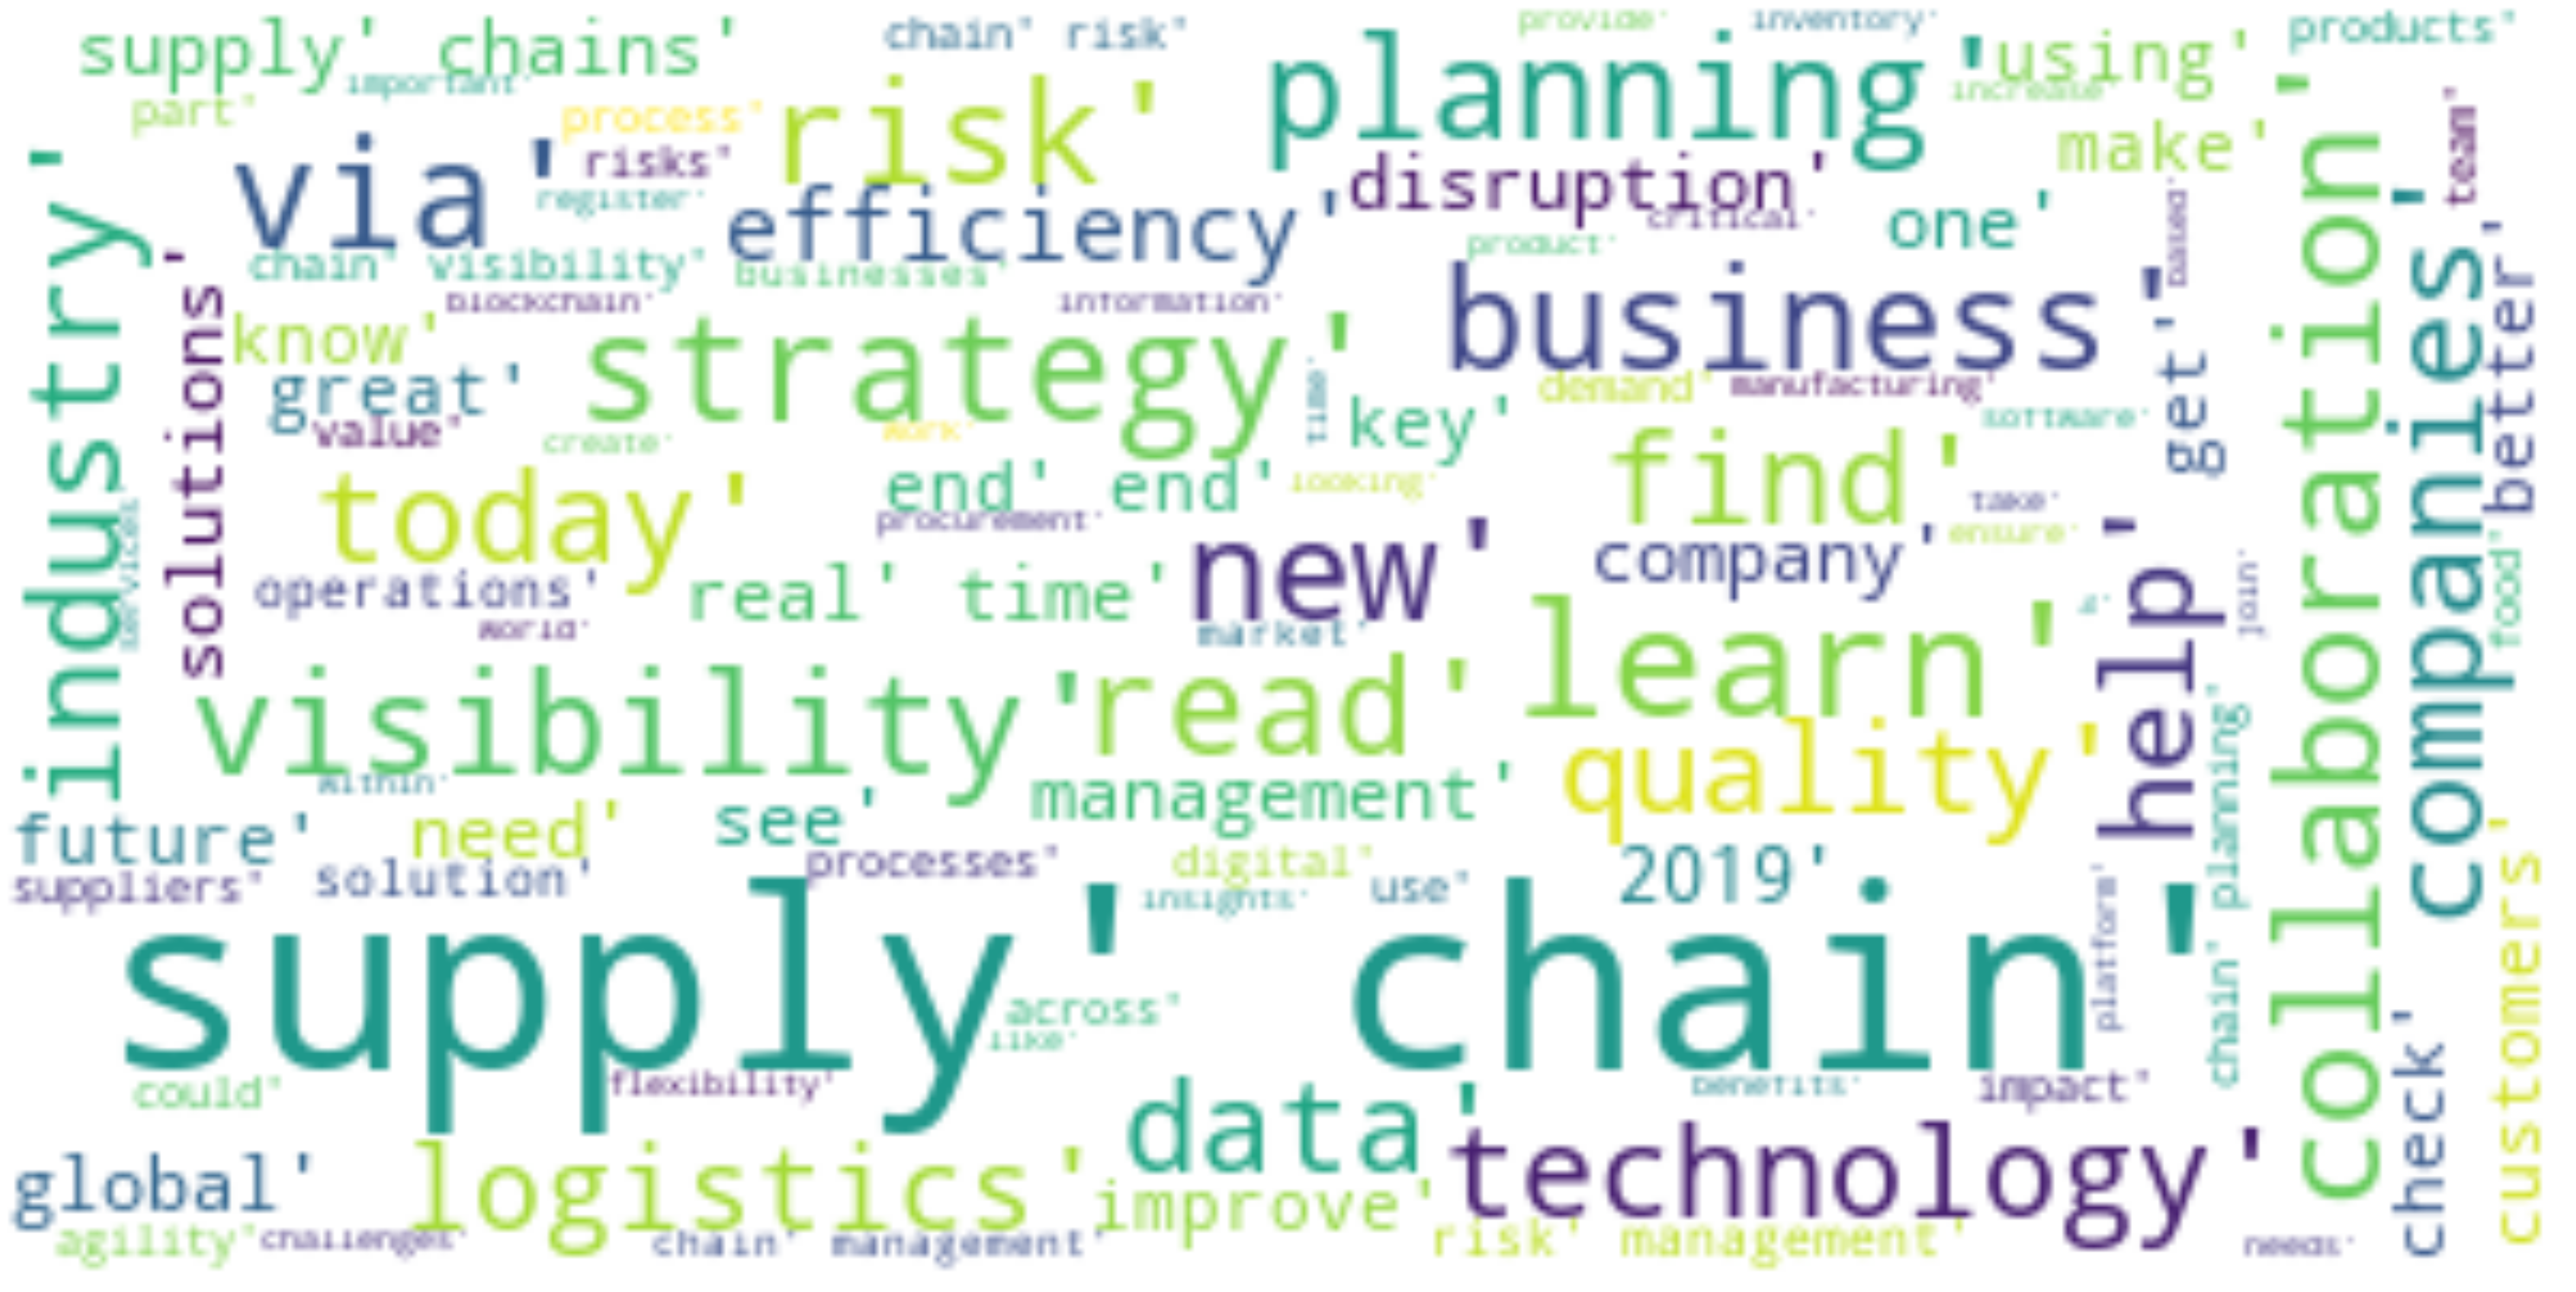

In [73]:
df_count1=df_count.sort_values(by='count').to_dict()
#word cloud of most frequently used words
%pip install wordcloud
from PIL import Image 
from wordcloud import WordCloud
wc = WordCloud( background_color="white", max_font_size=40, max_words=100).generate(str(all_words))


plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show();



N GRAM MODEL

In [19]:
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten

In [26]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

                 text  count
0        supply chain   4711
1           real time    455
2             end end    364
3          chain risk    333
4    chain visibility    301
5     risk management    301
6      chain planning    272
7    chain management    250
8  improve efficiency    157
9     demand planning    157


<AxesSubplot: xlabel='count', ylabel='text'>

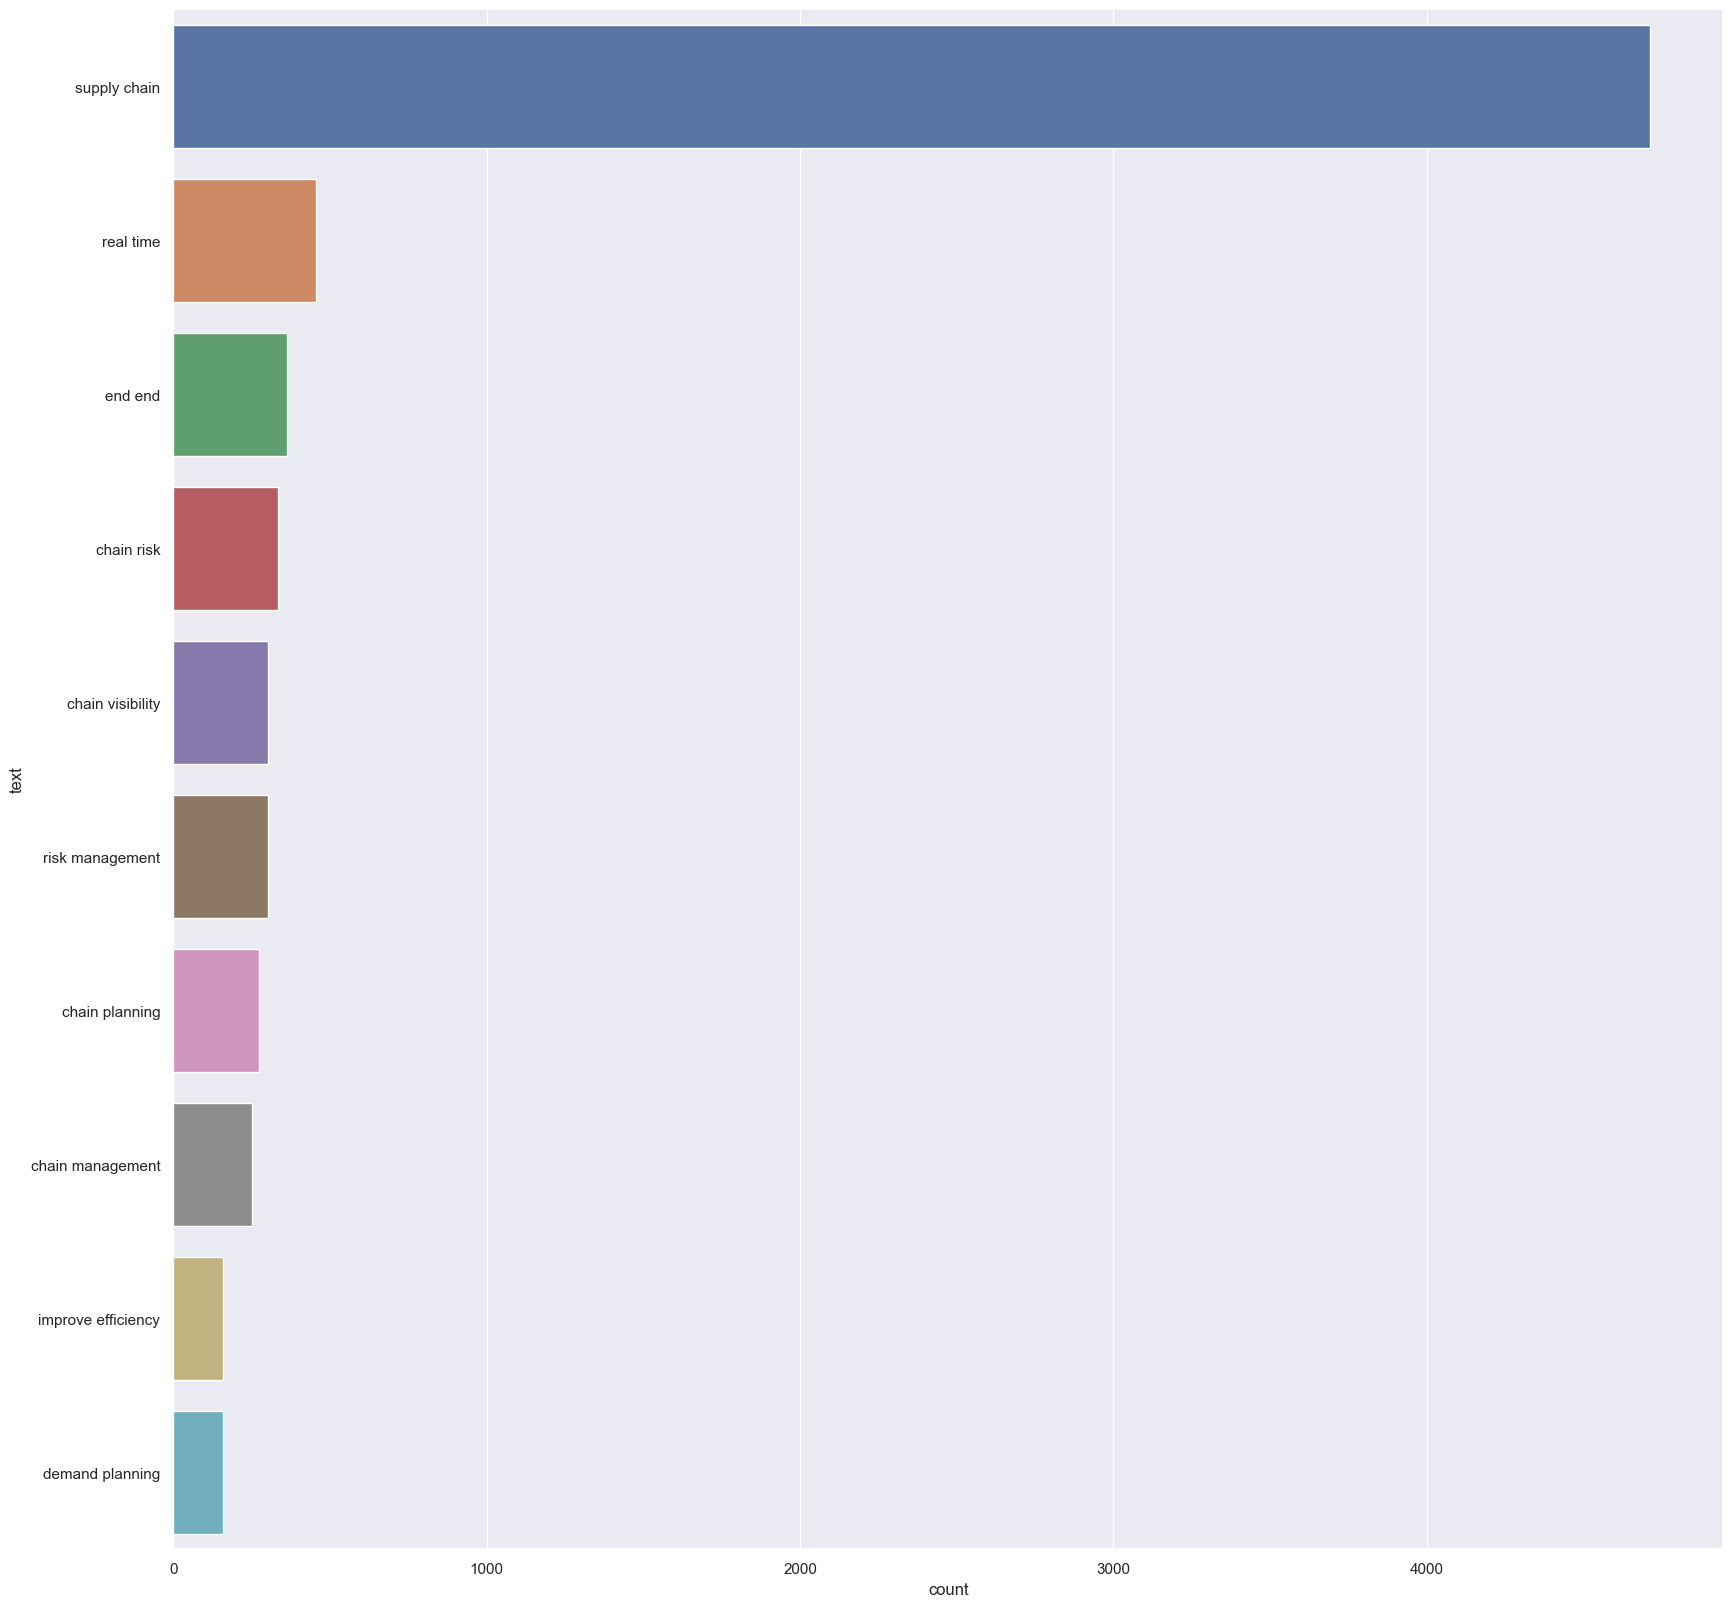

In [29]:
df1['lemma_str'] = [' '.join(map(str, l)) for l in df1['lemmatized_nohash']]
dropped = df1['lemma_str'].drop_duplicates(keep='first')

def ngrams_top(corpus,ngram_range,n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df3=pd.DataFrame(total_list,columns=['text','count'])
    return df3
dd_11 = ngrams_top(dropped,(2,2),n=10)
print(dd_11)
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(20,20)})
sns.barplot(x='count', y='text', data=dd_11)

                      text  count
0        supply chain risk    328
1  supply chain visibility    289
2    supply chain planning    268
3  supply chain management    248
4     real time visibility    150
5       end end visibility    130
6    supply chain strategy    124
7      global supply chain    108
8  visibility supply chain     97
9  supply chain efficiency     94


<AxesSubplot: xlabel='count', ylabel='text'>

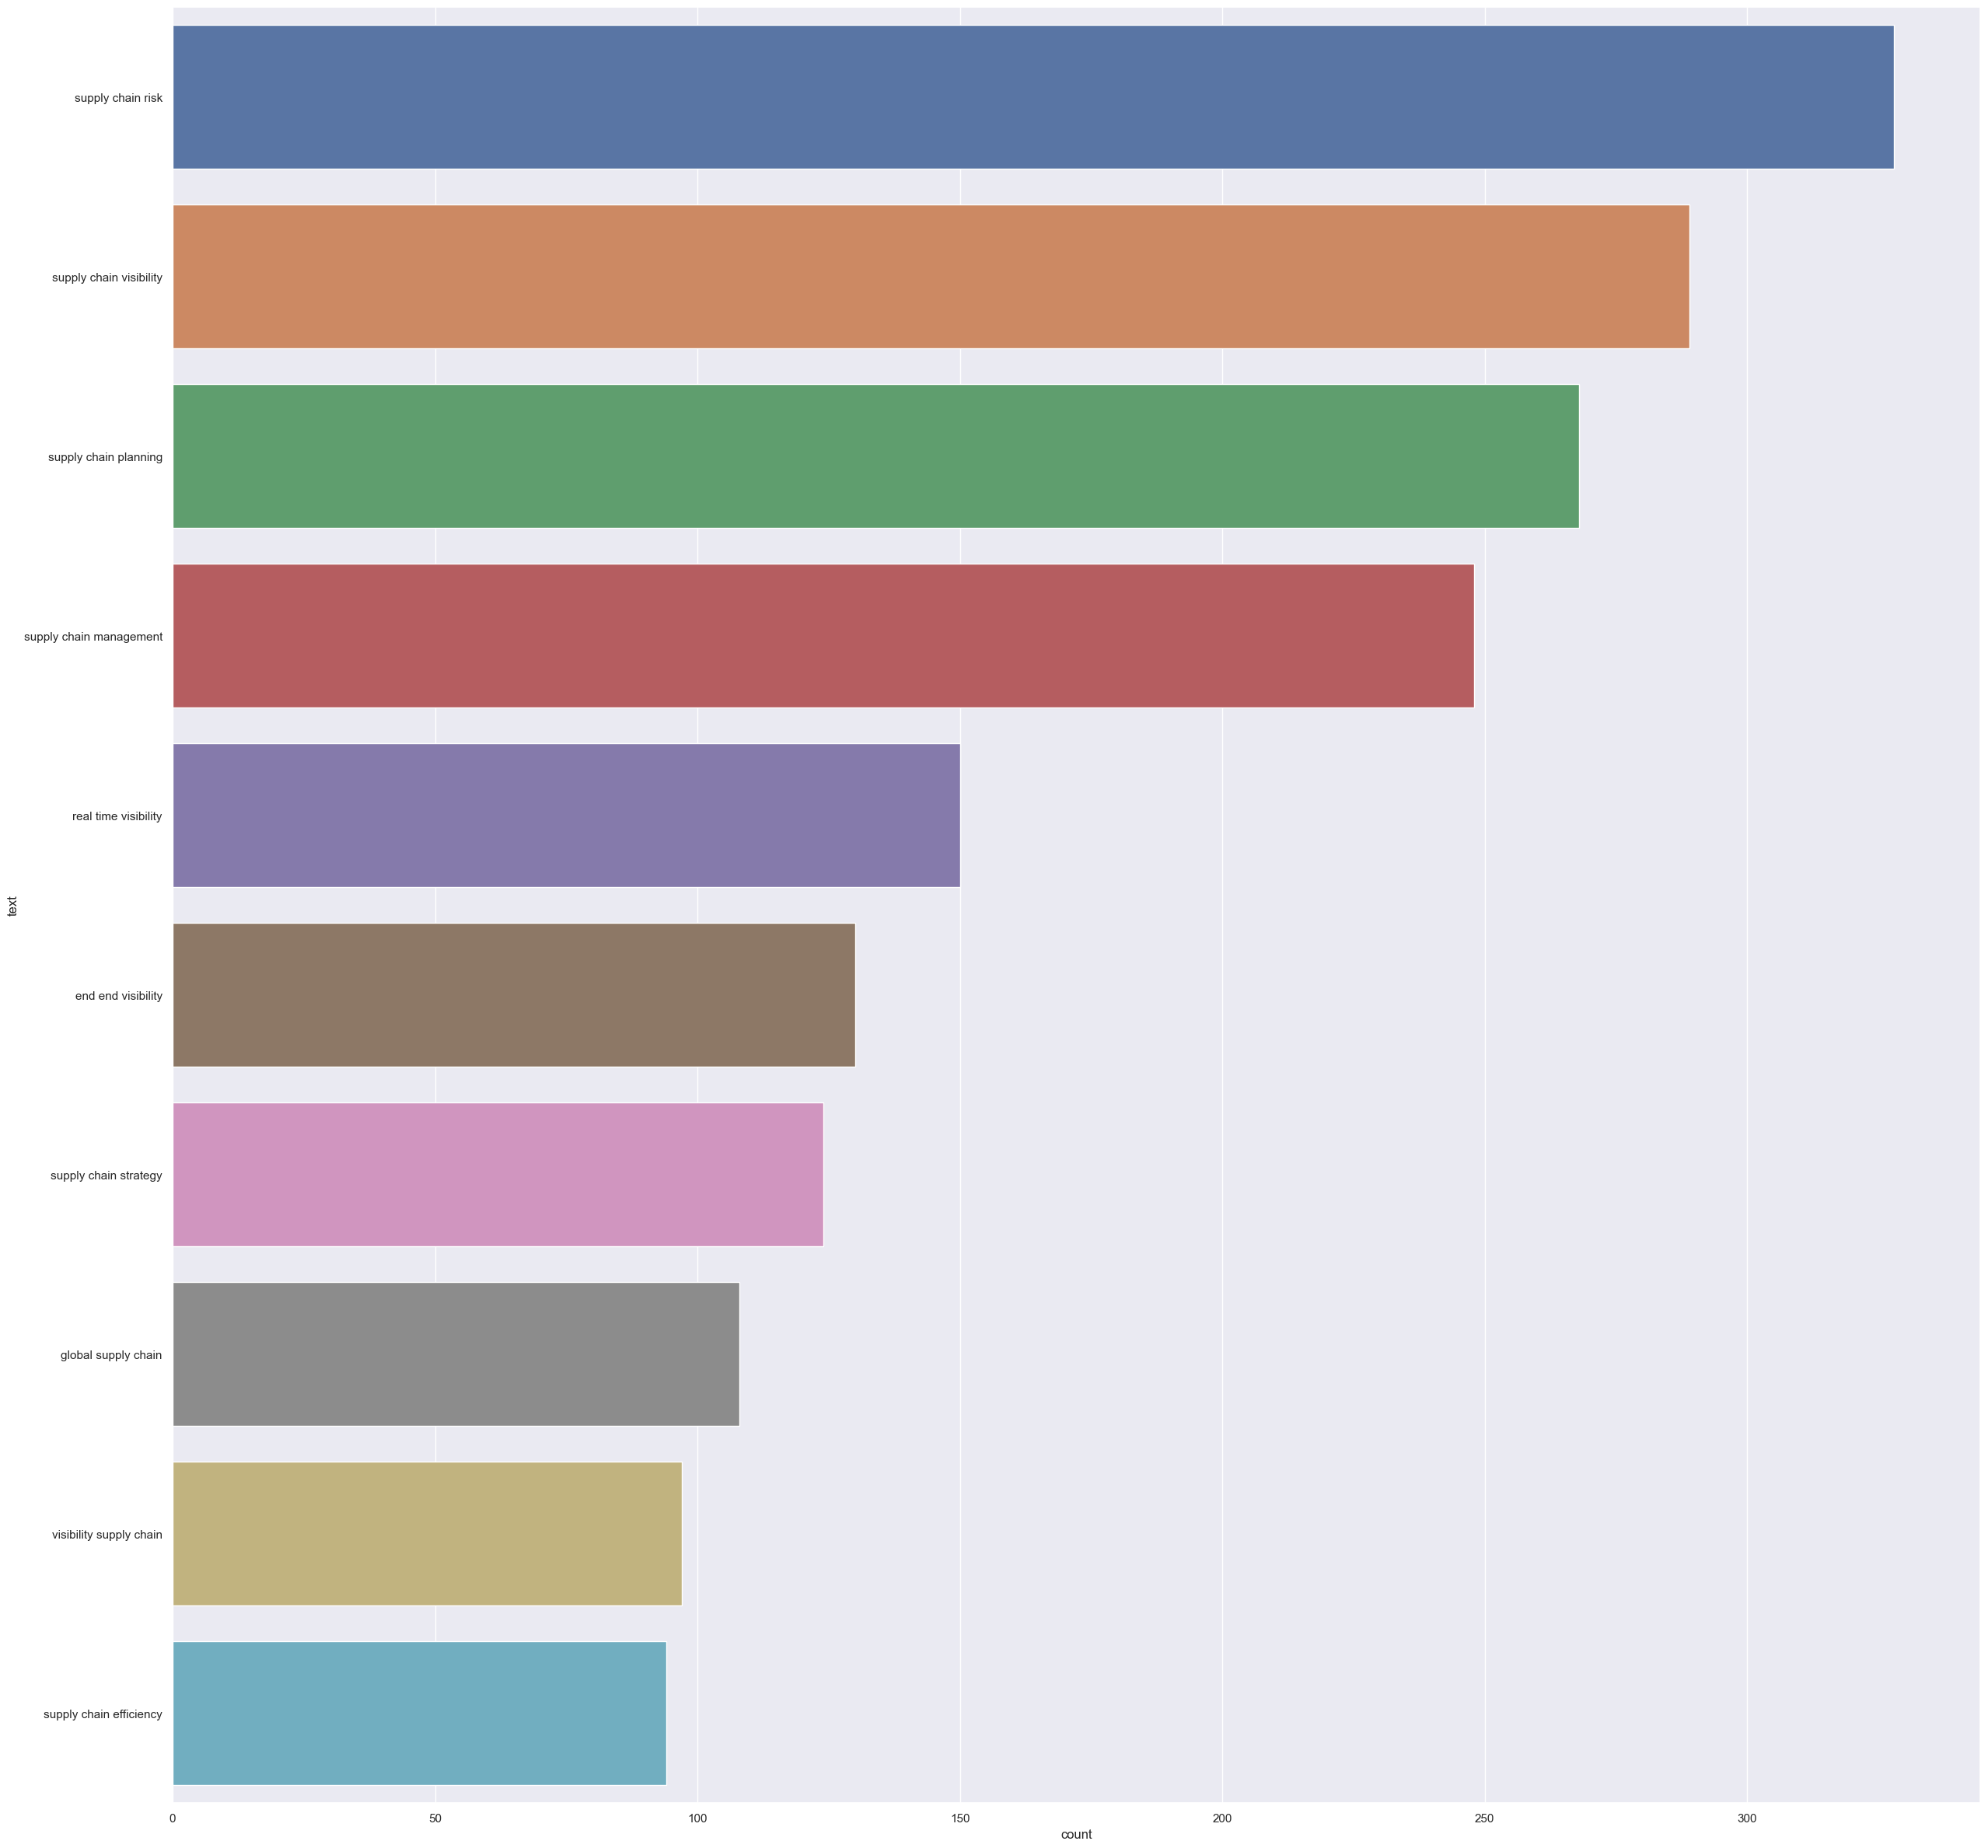

In [31]:
dd_22 = ngrams_top(dropped,(3,3),n=10)
print(dd_22)
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(30,30)})
sns.barplot(x='count', y='text', data=dd_22)

TOPIC MODELLING

In [78]:
clean_text= df1['lemmatized_nohash'].drop_duplicates(keep='first')

In [79]:
%pip install pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
from sklearn.model_selection import *
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 3.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8c6f4f6d0e963d4d84fb53bf29f08e5467494d6bb729075aa36bd722c822a137
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [81]:
#BAG OF WORDS VECTORISATION
#METHOD 1
# Create a dictionary of tokens
id2word = Dictionary(clean_text)

# Create a corpus object. Term document frequency
corpus = [id2word.doc2bow(token) for token in clean_text]

# Base LDA model 
lda_model = LdaMulticore(num_topics = 7, corpus = corpus, id2word = id2word, random_state=20,passes = 10,per_word_topics=True)

  0%|          | 0/4 [21:37<?, ?it/s]


In [82]:
print("Topics found via LDA:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

Topics found via LDA:
[(0, '0.108*"supply" + 0.107*"chain" + 0.026*"risk" + 0.016*"end" + 0.012*"management" + 0.012*"strategy" + 0.011*"visibility" + 0.009*"planning" + 0.009*"disruption" + 0.008*"read"'), (1, '0.011*"new" + 0.010*"risk" + 0.008*"strategy" + 0.007*"long" + 0.007*"great" + 0.006*"term" + 0.006*"amazon" + 0.005*"good" + 0.005*"disruption" + 0.005*"collaboration"'), (2, '0.016*"u" + 0.016*"join" + 0.015*"webinar" + 0.013*"2019" + 0.011*"register" + 0.011*"strategy" + 0.010*"today" + 0.009*"risk" + 0.008*"year" + 0.008*"learn"'), (3, '0.025*"visibility" + 0.025*"efficiency" + 0.012*"cost" + 0.011*"business" + 0.010*"technology" + 0.010*"improve" + 0.009*"company" + 0.009*"increase" + 0.008*"help" + 0.007*"industry"'), (4, '0.030*"quality" + 0.018*"risk" + 0.013*"product" + 0.012*"supplier" + 0.009*"help" + 0.007*"ensure" + 0.006*"find" + 0.006*"service" + 0.006*"strategy" + 0.006*"high"'), (5, '0.027*"planning" + 0.016*"visibility" + 0.014*"efficiency" + 0.013*"management

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.163859  0.049253       1        1  38.120079
0     -0.100284 -0.129798       2        1  27.139466
2      0.191968 -0.089815       3        1  18.391402
1      0.072174  0.170359       4        1  16.349054, topic_info=              Term         Freq        Total Category  logprob  loglift
168         supply  4652.000000  4652.000000  Default  30.0000  30.0000
155          chain  4574.000000  4574.000000  Default  29.0000  29.0000
27      efficiency  1654.000000  1654.000000  Default  28.0000  28.0000
64            risk  2502.000000  2502.000000  Default  27.0000  27.0000
195            end   757.000000   757.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
689          could   105.091165   309.057174   Topic4  -5.8688   0.7323
292           need   116.024613   819.109192   Topic4  -5.7698  -0.1434
122       business   120.517387  1523.414997   Topic4  -5.7318  -0.7259
662       industry   107.710506   849.086797   Topic4  -5.8441  -0.2537
112  collaboration   104.946071   817.738596   Topic4  -5.8701  -0.2421

[296 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
655       1  0.056881      0
655       2  0.938529      0
3058      3  0.979367     00
36        1  0.094845      1
36        2  0.043774      1
...     ...       ...    ...
2756      4  0.987660  write
14        1  0.002187   year
14        2  0.142142   year
14        3  0.699778   year
14        4  0.155263   year

[516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [ ]:
coherence_model = CoherenceModel(model = lda_model, texts = clean_text, coherence = "c_v")
coherence_lda_model_base = coherence_model.get_coherence()
print("\nCoherence Score: ", coherence_lda_model_base)


Coherence Score:  0.32050521239542207


In [ ]:
for i in range(5,10):
    lda_model = LdaMulticore(num_topics = i, corpus = corpus, id2word = id2word, random_state=20,passes = 10,per_word_topics=True)
    coherence_model = CoherenceModel(model = lda_model, texts = clean_text, coherence = "c_v")
    coherence_lda_model_base = coherence_model.get_coherence()
    print("\ntopic number",i,"Coherence Score: ", coherence_lda_model_base)


topic number 5 Coherence Score:  0.3110464702962866

topic number 6 Coherence Score:  0.33672219378131546

topic number 7 Coherence Score:  0.32050521239542207

topic number 8 Coherence Score:  0.3262905702507014

topic number 9 Coherence Score:  0.3168002681600755


HASHTAG ANALYSIS

                     word  count
0             supplychain  23269
1               logistics   3467
2                     scm   2288
3             procurement   1890
4                    risk   1622
5              compliance   1421
6                     iot   1370
7           manufacturing   1151
8              blockchain   1122
9              technology   1112
10  supplychainmanagement   1093
11         riskmanagement    966
12               strategy    946
13               business    919
14             management    829
15                     ai    792
16                quality    763
17                corpgov    757
18  digitaltransformation    741
19                   data    709


<AxesSubplot: xlabel='count', ylabel='word'>

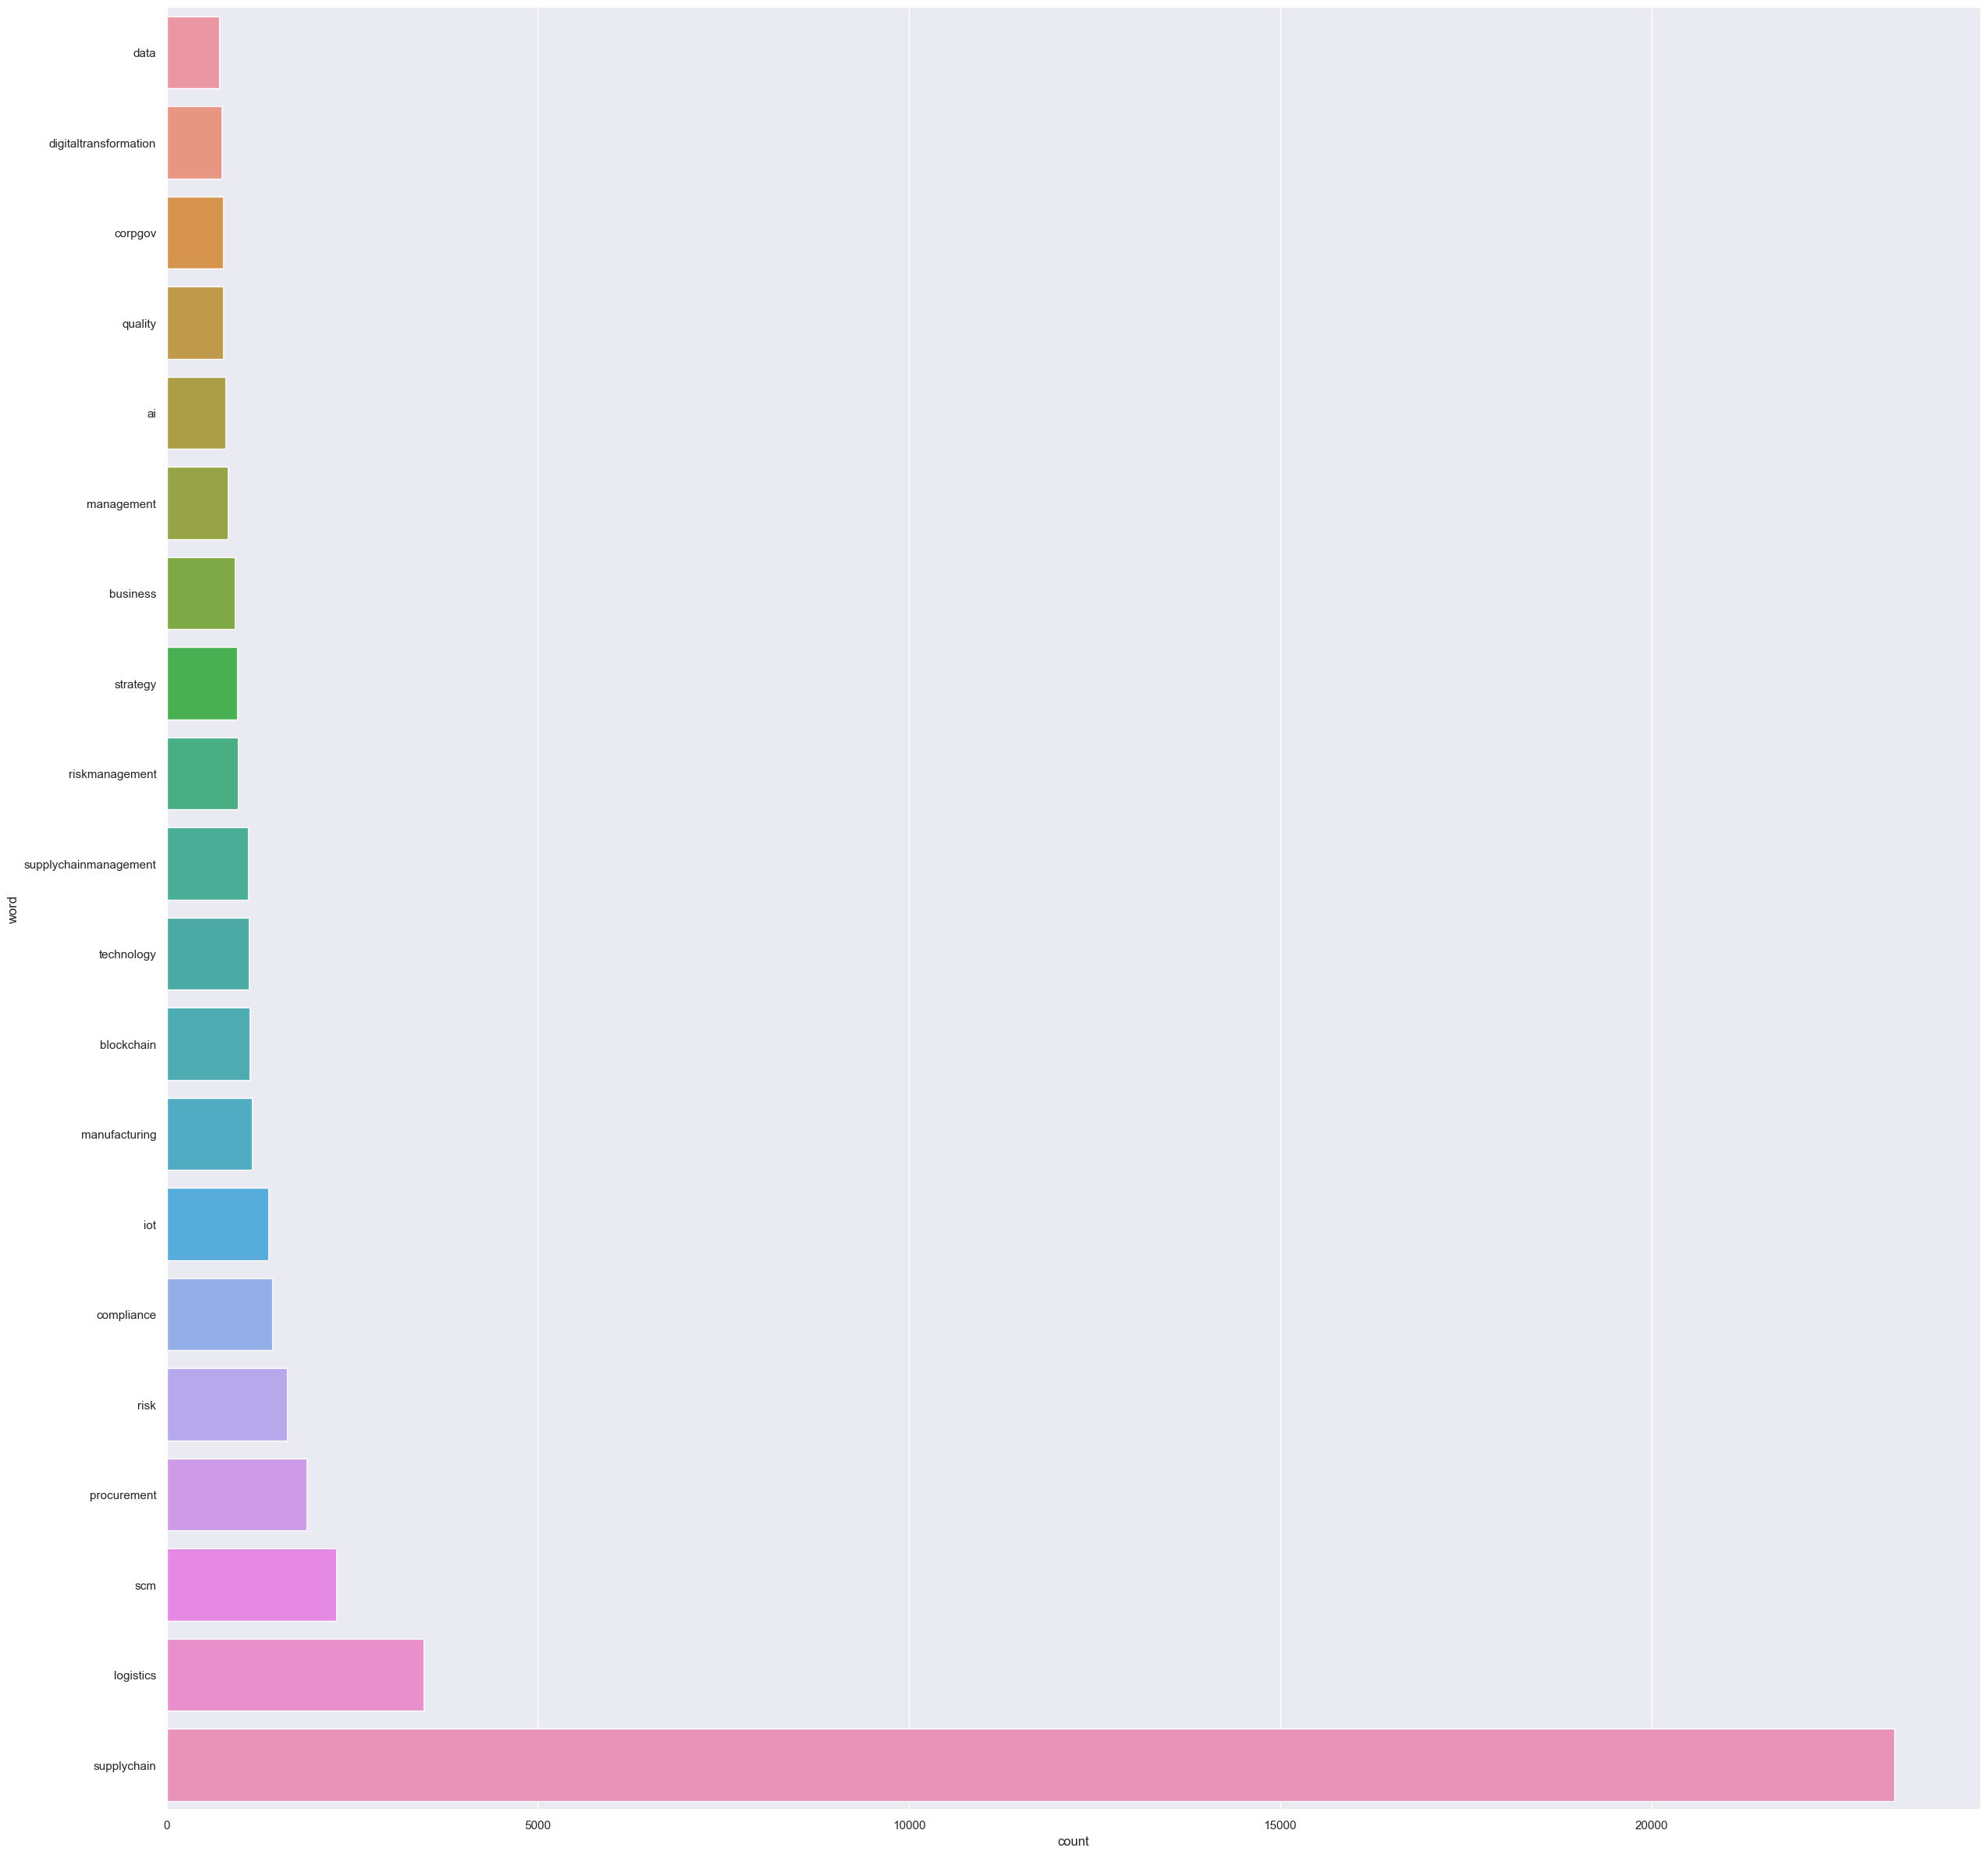

In [33]:
#counting word frequency with hashtags
import itertools
import collections
all_hashtags =[]
for text in (hashtags):
  for i in text:
    all_hashtags.append(i)
counts_no1 = collections.Counter(all_hashtags)
df_count=pd.DataFrame(counts_no1.most_common(20))
df_count.columns=['word','count']
print(df_count)

df_count = df_count.sort_values(by='count')
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(30,30)})
sns.barplot(x='count', y='word', data=df_count)


SENTIMENT ANALYSIS ON ENTIRE DATA



In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
df1['Polarity Score']=df1["lemma_str"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df1['Neutral Score']=df1["lemma_str"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df1['Negative Score']=df1["lemma_str"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df1['Positive Score']=df1["lemma_str"].apply(lambda x:SIA.polarity_scores(x)['pos'])
# Converting 0 to 1 Decimal Score to a Categorical Variable
df1['Sentiment']=''
df1.loc[df1['Polarity Score']>0,'Sentiment']='Positive'
df1.loc[df1['Polarity Score']==0,'Sentiment']='Neutral'
df1.loc[df1['Polarity Score']<0,'Sentiment']='Negative'




In [84]:
%pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from textblob import TextBlob

df1['polarity'] = df1['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1['subjectivity'] = df1['lemma_str'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [ ]:
df1.to_csv('senti_2019.csv')
files.download('senti_2019.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TWEETS CATEGORISATION

In [ ]:
import gensim
import gensim.downloader as gensim_api

## for BERT
%pip install transformers
import transformers
import os

In [28]:
import tensorflow as tf
print(tf.__version__)

2.8.2


CREATING THE DICTIONARY OF TOPICS AND **LABELS*





In [51]:
nlp = gensim_api.load("glove-wiki-gigaword-300")
def get_similar_words(lst_words, top, nlp):
    lst_out = lst_words
    for tupla in nlp.most_similar(lst_words, topn=top):
        lst_out.append(tupla[0])
    return list(set(lst_out))

In [52]:
## Create Dictionary {category:[keywords]}
dic_clusters = {}
dic_clusters["Concept "] = get_similar_words(['risk','visibility','collaboration','efficiency','cost','time','quality'], top=7, nlp=nlp)
dic_clusters["Stage"] = get_similar_words(['supplier','warehouse','distribution','logistics','retailer','customer'], top=7, nlp=nlp)
dic_clusters["Capability"] = get_similar_words(['planning','inventory','process','digital','technology','software','sap','learn','improve','solution','strategy'], top=7, nlp=nlp)
dic_clusters["Offering "] = get_similar_words(['product','service'],top=5, nlp=nlp)

# VISUALISE THE TOPICS

1.   List item
2.   List item



In [58]:
from sklearn import metrics, manifold
from tqdm import tqdm

In [ ]:
## word embedding
tot_words = [word for v in dic_clusters.values() for word in v]
X = nlp[tot_words]
        
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_GloVe = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf_GloVe) + len(v)
    dtf_group = pd.DataFrame(X[len(dtf_GloVe):size], columns=["x","y"], index=v)
    dtf_group["cluster"] = k
    dtf_GloVe = dtf_GloVe.append(dtf_group)
        
## plot
%matplotlib notebook
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=dtf_GloVe, x="x", y="y", hue="cluster", ax=ax)
#ax.legend().texts[0].set_text(None)
ax.legend()
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], yticks=[], yticklabels=[])
for i in range(len(dtf_GloVe)):
    ax.annotate(dtf_GloVe.index[i], xy=(dtf_GloVe["x"].iloc[i], dtf_GloVe["y"].iloc[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
%matplotlib inline

BERT MODEL FOR WORD EMBEDDING

In [57]:
## for BERT
import transformers
## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
## bert model
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')

  0%|          | 0/4 [00:40<?, ?it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [55]:
## function to apply
def utils_bert_embedding(txt, tokenizer, nlp):
    '''
    Word embedding with Bert (equivalent to nlp["word"]).
    :parameter
        :param txt: string 
        :param tokenizer: transformers tokenizer
        :param nlp: transformers bert
    :return
        tensor sentences x words x vector (1x3x768) 
    '''
    # tokenize sentence to tokens (integers)
    idx = tokenizer.encode(txt)
    # convert to array of shape (1, num_words+2) - EOS and CLS added
    idx = np.array(idx)[None,:]
    # generate embeddings for each token - output is a tuple
    embedding = nlp(idx)
    # select first member of the tuple, remove first dimension which is 1 to get (num_words,embedding size 712)
    # exclude CLS and EOS tokens
    X = np.array(embedding[0][0][1:-1])
    return X

In [42]:
## create list of news vector
lst_mean_vecs = [utils_bert_embedding(txt, tokenizer, nlp).mean(0) for txt in tqdm(df1["lemma_str"])]

  5%|▌         | 1313/25225 [07:44<2:10:04,  3.06it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 25225/25225 [2:20:54<00:00,  2.98it/s]


In [44]:
X = np.array(lst_mean_vecs)
X.shape
X


array([[ 0.15909043, -0.34014466,  0.61195093, ..., -0.49241063,
        -0.0103263 , -0.5646951 ],
       [-0.29390866, -0.26432252,  0.29992875, ..., -0.02376626,
        -0.17260115, -0.18143651],
       [ 0.12881222,  0.06573346,  0.31282946, ..., -0.40050817,
        -0.0922542 , -0.02031254],
       ...,
       [ 0.23050225, -0.5871256 ,  0.30553237, ..., -0.5354504 ,
        -0.05622752, -0.15983611],
       [-0.17485525, -0.24583648,  0.51183206, ..., -0.21063863,
         0.09922009, -0.09988187],
       [-0.3419686 , -0.2100968 , -0.19941103, ..., -0.4723604 ,
         0.33055297,  0.24309212]], dtype=float32)

In [59]:
dic_y = {k:utils_bert_embedding(v, tokenizer, nlp).mean(0) for k,v in tqdm(dic_clusters.items())}


100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


In [71]:
print(dic_clusters["Offering "])
print(dic_clusters["Concept "])
print(dic_clusters["Stage"])
print(dic_clusters["Capability"])

['customer', 'customers', 'company', 'product', 'service', 'products', 'services']
['increased', 'cost', 'better', 'efficiency', 'increasing', 'because', 'quality', 'time', 'collaboration', 'risk', 'improve', 'visibility', 'costs', 'increase']
['retailer', 'customer', 'stores', 'warehouse', 'distributor', 'supply', 'distribution', 'company', 'supplier', 'retail', 'suppliers', 'store', 'logistics']
['inventory', 'software', 'systems', 'better', 'enable', 'strategy', 'solution', 'planning', 'process', 'need', 'sap', 'develop', 'digital', 'improve', 'management', 'learn', 'technologies', 'technology']


# MODEL DESIGN AND PREDICTIONS\\

In [61]:
def fix_NAN_inf_values(x):
    '''Replace NaN with zero and infinity with large finite numbers'''
    if len(np.where(np.isnan(X))[0])>0 or len(np.where(np.isnan(X))[1])>0:
        return np.nan_to_num(X)

In [86]:
## compute cosine similarities
## Output matrix with shape: number of news x number of labels (3, Entertainment/Politics/Tech). To put it another way, each row will represent an article and contain one similarity score for each target cluster.
similarities = np.array([metrics.pairwise.cosine_similarity(fix_NAN_inf_values(X), y.reshape(1,-1)).T.tolist()[0] for y in dic_y.values()]).T
print(similarities)

## adjust and rescale
labels = list(dic_y.keys())
for i in range(len(similarities)):
    ### assign randomly if there is no similarity   ###############################################################################################################
    if sum(similarities[i]) == 0:
        similarities[i] = [0]*len(labels)
        similarities[i][np.random.choice(range(len(labels)))] = 1
    ### rescale so they sum = 1
    similarities[i] = similarities[i] / sum(similarities[i])

## classify the label with highest similarity score
predicted_prob = similarities
predicted = [labels[np.argmax(pred)] for pred in predicted_prob]
print(len(predicted))

df1["labels"] = predicted

[[0.63816524 0.47366869 0.68153131 0.52122557]
 [0.65643716 0.47966301 0.72860134 0.56736594]
 [0.72435856 0.60172772 0.77843595 0.59899342]
 ...
 [0.61258376 0.39674449 0.60928977 0.48329574]
 [0.72686076 0.46470422 0.69516897 0.58989835]
 [0.63163787 0.26549006 0.55643111 0.3872214 ]]
25225


In [87]:
df1.to_csv('labelled_2019.csv')
files.download('labelled_2019.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>